In [8]:
from manifold_learning import IMD
from FastCCM import CCM
import numpy as np
from sklearn.decomposition import PCA
from manifold_learning.utils import utils
from manifold_learning.data.data_loader import load_csv_dataset,get_truncated_lorenz_rand
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import importlib
importlib.reload(IMD)
importlib.reload(CCM)
importlib.reload(utils)

<module 'manifold_learning.utils.utils' from '/home/iaroslav/Documents/Python projects/manifold_learning/src/manifold_learning/utils/utils.py'>

In [2]:
def gaussian_kernel(x, y, sigma=1.0):
    return np.exp(-np.linalg.norm(x - y,axis=1)**2 / (2 * sigma**2))

In [3]:
X = get_truncated_lorenz_rand(400,n_steps=20000)

In [4]:
exp_kernel_grid = np.array(np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),6), np.linspace(X[:,2].min(),X[:,2].max(),6))).reshape(2,-1).T

In [5]:
X_ = [get_truncated_lorenz_rand(400,n_steps=20000)[:,[0,2]] for i in range(5)]
observables = np.concatenate([np.array([gaussian_kernel(x,e,sigma=15) for e in exp_kernel_grid]) for x in X_]).T

observables = StandardScaler().fit_transform(observables)

Epoch 1/1, Loss: 1.2790
Epoch 1/1, Loss: 1.2100
Epoch 1/1, Loss: 1.1711
Epoch 1/1, Loss: 1.1463
Epoch 1/1, Loss: 1.1262
Epoch 1/1, Loss: 1.1083
Epoch 1/1, Loss: 1.0930
Epoch 1/1, Loss: 1.0832
Epoch 1/1, Loss: 1.0684
Epoch 1/1, Loss: 1.0557
Epoch 1/1, Loss: 1.0427
Epoch 1/1, Loss: 1.0314
Epoch 1/1, Loss: 1.0213
Epoch 1/1, Loss: 1.0080
Epoch 1/1, Loss: 0.9949
Epoch 1/1, Loss: 0.9841
Epoch 1/1, Loss: 0.9709
Epoch 1/1, Loss: 0.9540
Epoch 1/1, Loss: 0.9431
Epoch 1/1, Loss: 0.9299
Epoch 1/1, Loss: 0.9146
Epoch 1/1, Loss: 0.9070
Epoch 1/1, Loss: 0.8931
Epoch 1/1, Loss: 0.8761
Epoch 1/1, Loss: 0.8653
Epoch 1/1, Loss: 0.8524
Epoch 1/1, Loss: 0.8405
Epoch 1/1, Loss: 0.8234
Epoch 1/1, Loss: 0.8142
Epoch 1/1, Loss: 0.8004
Epoch 1/1, Loss: 0.7880
Epoch 1/1, Loss: 0.7834
Epoch 1/1, Loss: 0.7683
Epoch 1/1, Loss: 0.7566
Epoch 1/1, Loss: 0.7468
Epoch 1/1, Loss: 0.7373
Epoch 1/1, Loss: 0.7314
Epoch 1/1, Loss: 0.7253
Epoch 1/1, Loss: 0.7141
Epoch 1/1, Loss: 0.7043
Epoch 1/1, Loss: 0.6977
Epoch 1/1, Loss:

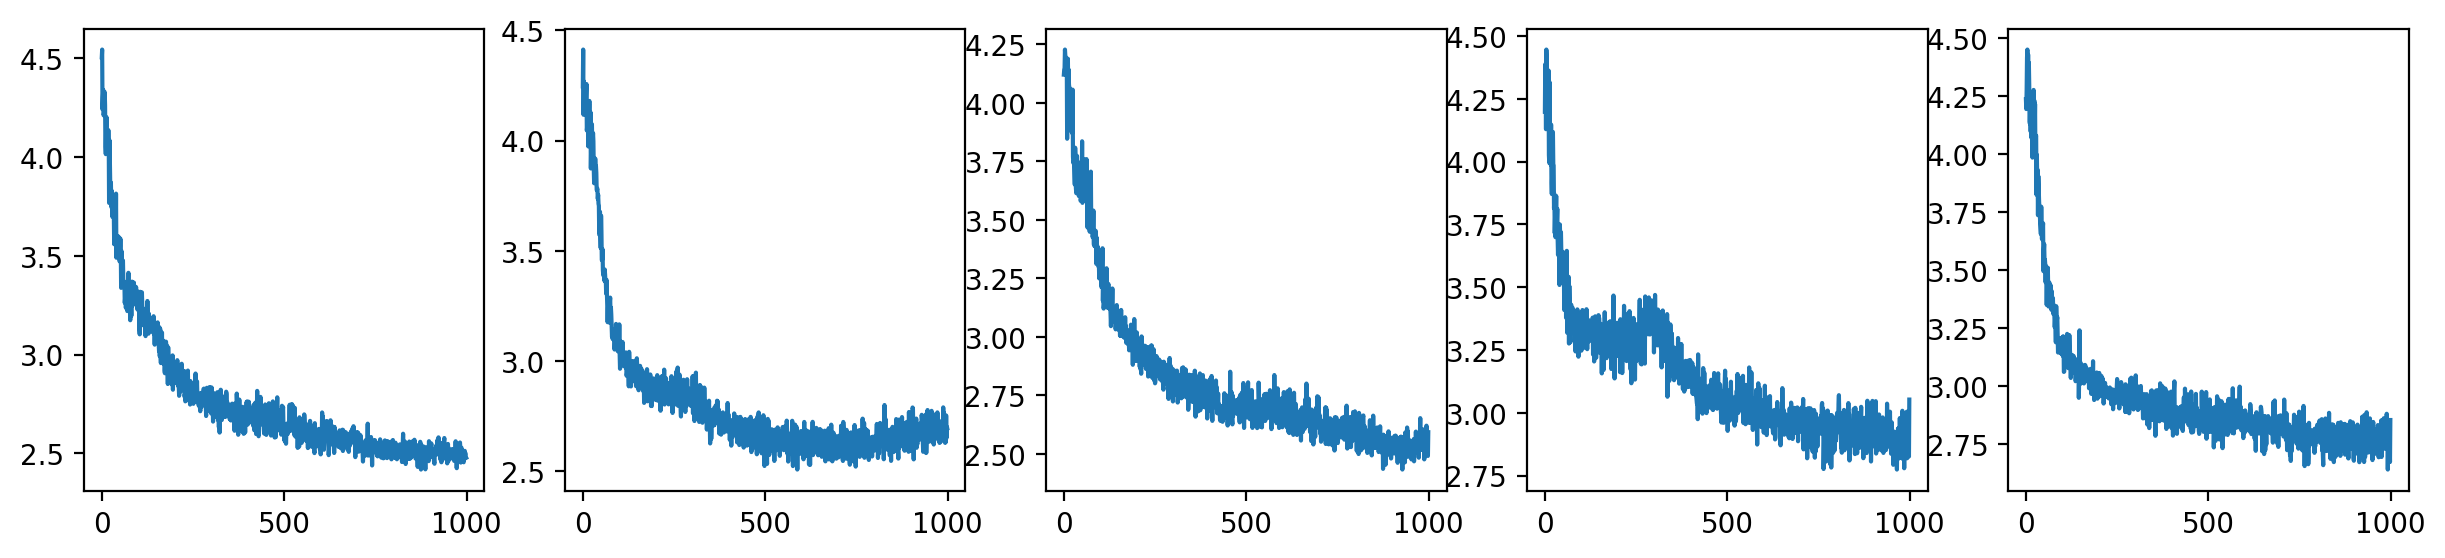

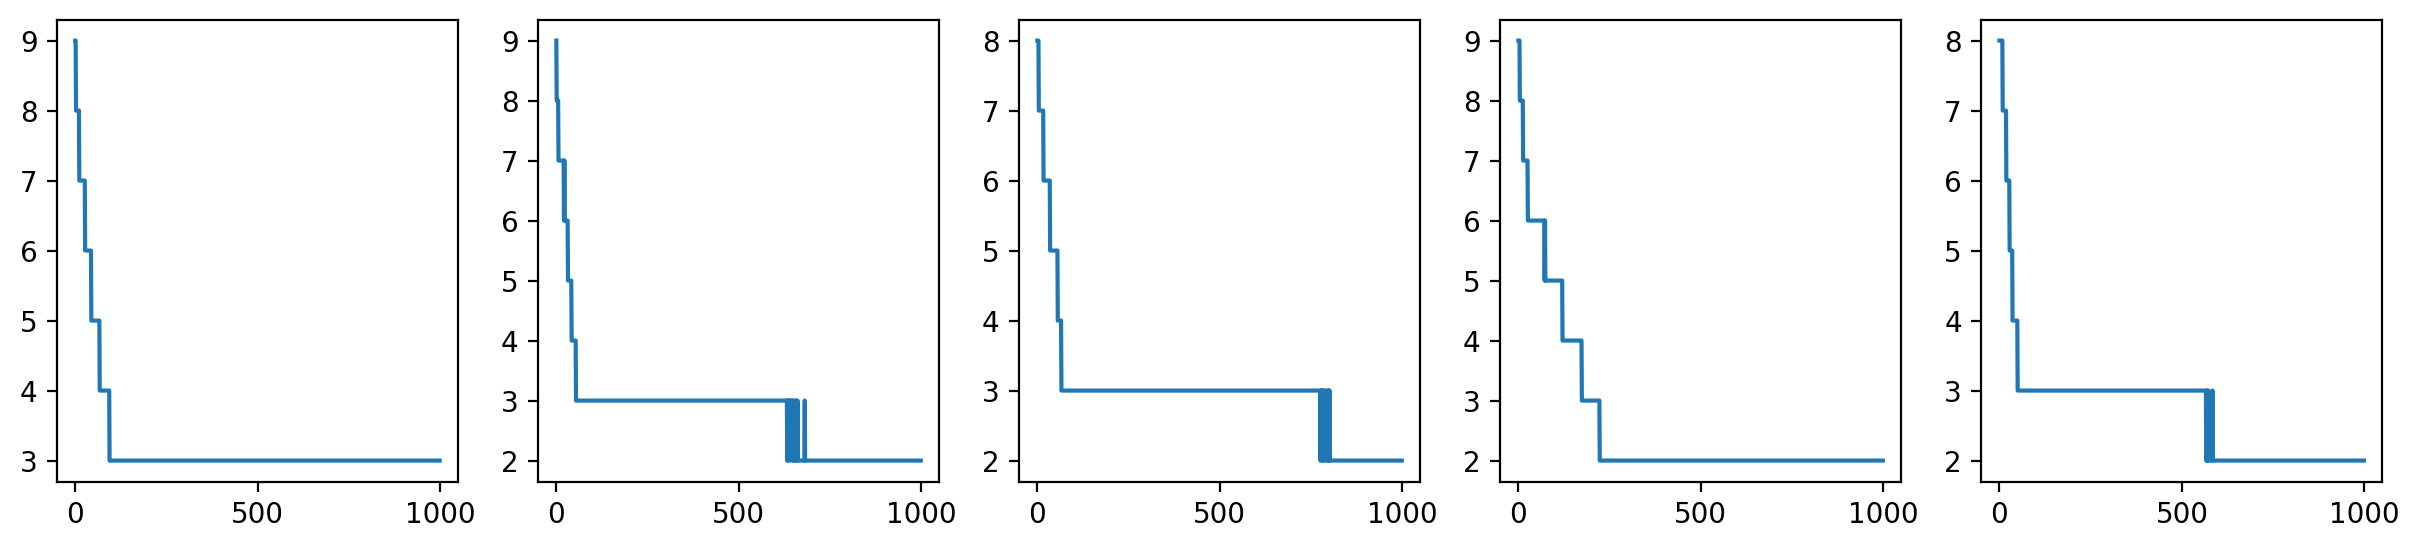

In [14]:
trainer = IMD.IMD_nD(observables.shape[1], embed_dim=10, n_components=5,subtract_corr=True, device="cuda")

corr_dims = []
ranks = []


for i in range(1000):
    trainer.fit(observables, sample_len=400, library_len=1200, 
                exclusion_rad=20, nbrs_num=30, tp=20, 
                epochs=1, num_batches=32,optimizer="Adagrad", learning_rate=0.002,tp_policy="fixed")
    unmixed = trainer.predict(observables)
    corr_dims += [[utils.calculate_correlation_dimension(unmixed[np.random.randint(0,unmixed.shape[0],1000),i],device="cuda") for i in range(unmixed.shape[1])]]
    ranks += [[utils.calculate_rank_for_variance(unmixed[np.random.randint(0,unmixed.shape[0],5000),i],0.975) for i in range(unmixed.shape[1])]]
corr_dims = np.array(corr_dims)
ranks = np.array(ranks)

plt.figure(figsize=(3*unmixed.shape[1],3),dpi=200)
for i in range(unmixed.shape[1]):
    plt.subplot(1,unmixed.shape[1],i+1)
    plt.plot(corr_dims[:,i])

plt.figure(figsize=(3*unmixed.shape[1],3),dpi=200)
for i in range(unmixed.shape[1]):
    plt.subplot(1,unmixed.shape[1],i+1)
    plt.plot(ranks[:,i])

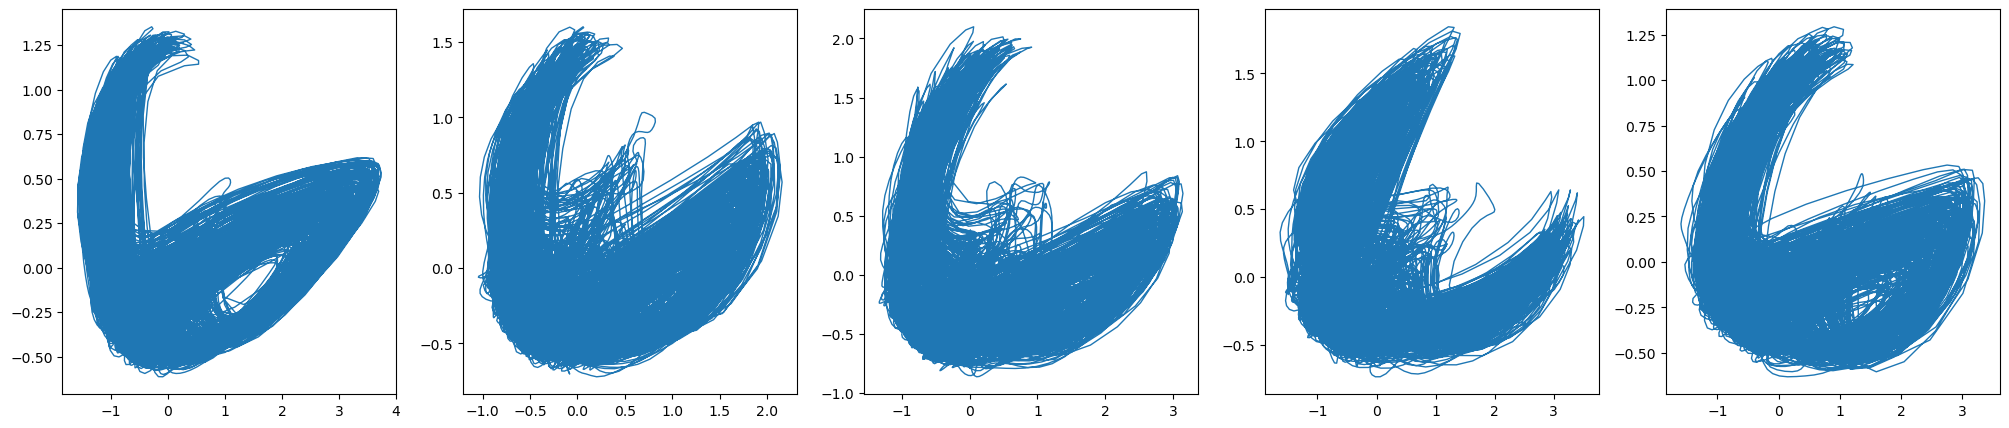

In [15]:
plt.figure(figsize=(5*unmixed.shape[1],5))
for i in range(unmixed.shape[1]):
    plt.subplot(1,unmixed.shape[1],i+1)
    x_pca = PCA(2).fit_transform(unmixed[:,i,:])
    plt.plot(x_pca[:,0],x_pca[:,1],linewidth=1)